In [1]:
import requests as req
import datetime as dt
import csv

In [2]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = req.get(url)

In [3]:
resp.status_code

200

In [4]:
dados = resp.json()

In [5]:
final_data = []
for d in dados:
    final_data.append([d['Confirmed'], d['Deaths'], d['Recovered'], d['Active'], d['Date']])


In [6]:
final_data.insert(0, ['Confirmed','Deaths', 'Recovered', 'Active','Date'])

In [7]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [8]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]


In [9]:
with open('brasil-covid19-report.csv','w', newline = '') as report_write:
    write = csv.writer(report_write)
    write.writerows(final_data)

In [10]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [11]:
with open('brasil-covid19-report.csv','r') as report_read:
    reader = csv.reader(report_read, delimiter = ',')
    for i in reader:
        print(i)

['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date']
['1', '0', '0', '1', '2020-02-26']
['1', '0', '0', '1', '2020-02-27']
['1', '0', '0', '1', '2020-02-28']
['2', '0', '0', '2', '2020-02-29']
['2', '0', '0', '2', '2020-03-01']
['2', '0', '0', '2', '2020-03-02']
['2', '0', '0', '2', '2020-03-03']
['4', '0', '0', '4', '2020-03-04']
['4', '0', '0', '4', '2020-03-05']
['13', '0', '0', '13', '2020-03-06']
['13', '0', '0', '13', '2020-03-07']
['20', '0', '0', '20', '2020-03-08']
['25', '0', '0', '25', '2020-03-09']
['31', '0', '0', '31', '2020-03-10']
['38', '0', '0', '38', '2020-03-11']
['52', '0', '0', '52', '2020-03-12']
['151', '0', '0', '151', '2020-03-13']
['151', '0', '0', '151', '2020-03-14']
['162', '0', '0', '162', '2020-03-15']
['200', '0', '1', '199', '2020-03-16']
['321', '1', '2', '318', '2020-03-17']
['372', '3', '2', '367', '2020-03-18']
['621', '6', '2', '613', '2020-03-19']
['793', '11', '2', '780', '2020-03-20']
['1021', '15', '2', '1004', '2020-03-21']
['1546', '25', '

In [12]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [13]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [14]:
def create_chart(x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options':options
    }
    return chart

In [15]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = req.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [16]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [19]:
from PIL import Image
from IPython.display import display

In [23]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

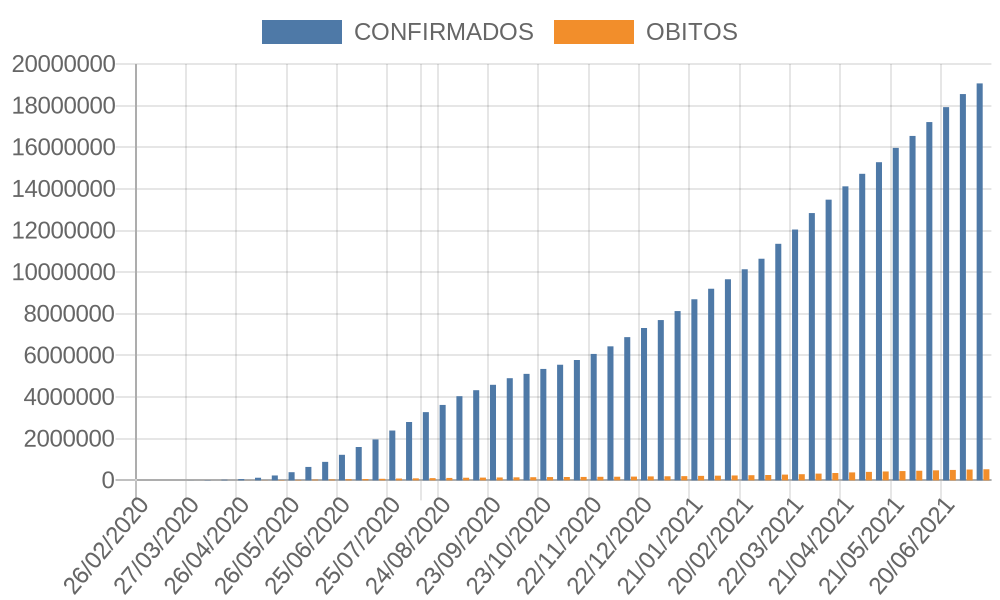

In [26]:
y_data_1 = []
for i in final_data[1::10]:
    y_data_1.append(i[CONFIRMADOS])

y_data_2 = []
for i in final_data[1::10]:
    y_data_2.append(i[OBITOS])
    
labels = ['CONFIRMADOS','OBITOS']

x = []
for i in final_data[1::10]:
    x.append(i[DATA].strftime('%d/%m/%Y'))
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title = 'Gráfico de Obitos e Casos Confirmados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [30]:
from urllib.parse import quote

In [33]:
def get_api_qrcode(link):
    text = quote(link)
    url_base = 'https://quickchart.io/qr'
    resp = req.get(f'{url_base}?text={text}')
    return resp.content

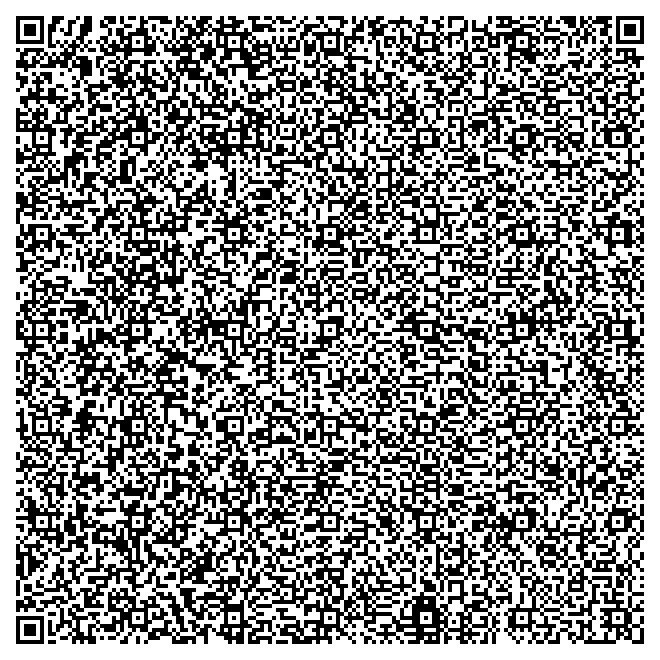

In [35]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')